<a href="https://colab.research.google.com/github/MahmoudAlsayes/pythonProject/blob/master/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# introduction to Regression with nural network

In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.17.0


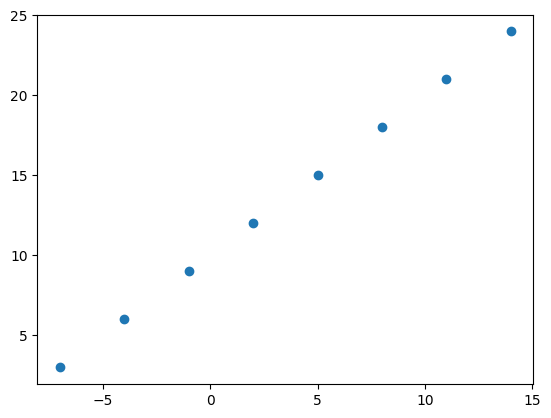

In [2]:
## Create data to view and fit
import numpy as np
import matplotlib.pyplot as plt
# Create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#visualize it
plt.scatter(X,y)

In [3]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
hous_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
hous_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0],y[0]

(-7.0, 3.0)

In [6]:
X[1],y[1]

(-4.0, 6.0)

In [7]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0],y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy arrays into tensor
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
X.shape

TensorShape([8])

In [12]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

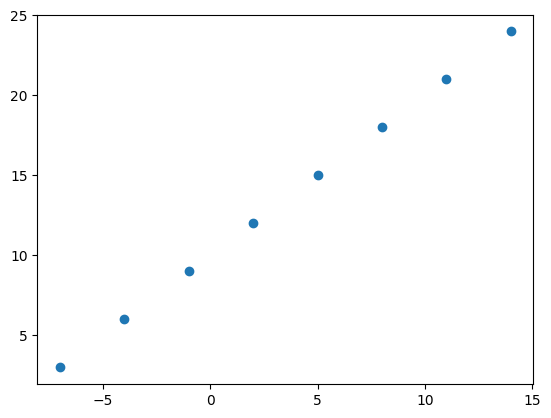

In [13]:
plt.scatter(X,y)

## Steps in modeling with tensor
1. **Create a model** - define inout and output layers , as well as the hidden layers of a deep learning model
2. **compiling a model** - define the loss function / optimizer / evaluation
3. **Fitting a model**

In [14]:
# set random seed
tf.random.set_seed(42)

# 1. create a model using the Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # Stochastic gradient descent
              metrics=["mae"]
              )


# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 17.7998 - mae: 17.7998
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 17.5185 - mae: 17.5185
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 17.2373 - mae: 17.2373
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 16.9560 - mae: 16.9560
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 16.6748 - mae: 16.6748


In [15]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Try and make aprediction using our model
y_pred=model.predict(tf.expand_dims(17.0, axis=-1),)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


array([[-11.8516655]], dtype=float32)

In [17]:
y_pred+16

array([[4.1483345]], dtype=float32)

### Improving our model


In [18]:
# Let's rebuild our model
# 1. create a model
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2.compie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


#3. fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 17.0168 - mae: 17.0168
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 16.7356 - mae: 16.7356
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 16.4543 - mae: 16.4543
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 16.1731 - mae: 16.1731
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 15.8918 - mae: 15.8918
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 15.6106 - mae: 15.6106
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 15.3293 - mae: 15.3293
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 15.0481 - mae: 15.0481
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 14.8146 - mae: 14.8146
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 14.6821 - mae: 14.6821
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 14.5496 - mae: 14.5496
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 14.4171 - mae: 14.4171
Epoch 13/100
1/1 

In [19]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
# Try and make aprediction using our model
y_pred=model.predict(tf.expand_dims(17.0, axis=-1),)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[29.326077]], dtype=float32)

In [21]:
# Let's improve the model
# 1. create the model (with extra hidden layer with 100 hidden units)
model =tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])
#2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.9115 - mae: 12.9115
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 12.2834 - mae: 12.2834
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.6485 - mae: 11.6485
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.0057 - mae: 11.0057
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.3525 - mae: 10.3525
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.6852 - mae: 9.6852
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 9.0004 - mae: 9.0004
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.2947 - mae: 8.2947
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.5650 - mae: 7.5650
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 6.8526 - mae: 6.8526
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.8034 - mae: 6.8034
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.0763 - mae: 7.0763
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [22]:
y_pred=model.predict(tf.expand_dims(17.0, axis=-1),)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


array([[27.25944]], dtype=float32)

## Evaluating a model

In [23]:
x=tf.range(-100,100,4)

In [24]:
X=tf.expand_dims(tf.range(-100,100,4),axis=-1)
X

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56],
       [  60],
       [  64],
       [  68],
       [  72],
       [  76],
       [  80],
       [  84],
       [  88],
       [  92],
       [  96]], dtype=int32)>

In [25]:
# Make a labels for the data set
y=x+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

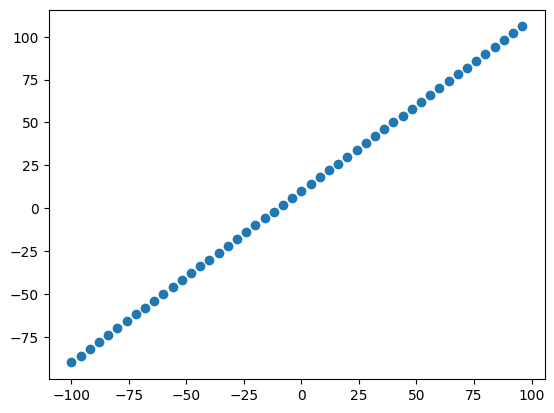

In [26]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### the 3 sets
1. **train**
2. **valid**
3. **test**


In [27]:
# check the length
len(X)

50

In [28]:
# Split the data into train and test dataset
X_train= X[:40]# first 40 training samples(80% of the data)
y_train=y[:40]
X_test= X[40:] # last 10 are testing samples (20% of the data)
y_test= y[40:]
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(40, 10, 40, 10)

 ## Visualizing the data


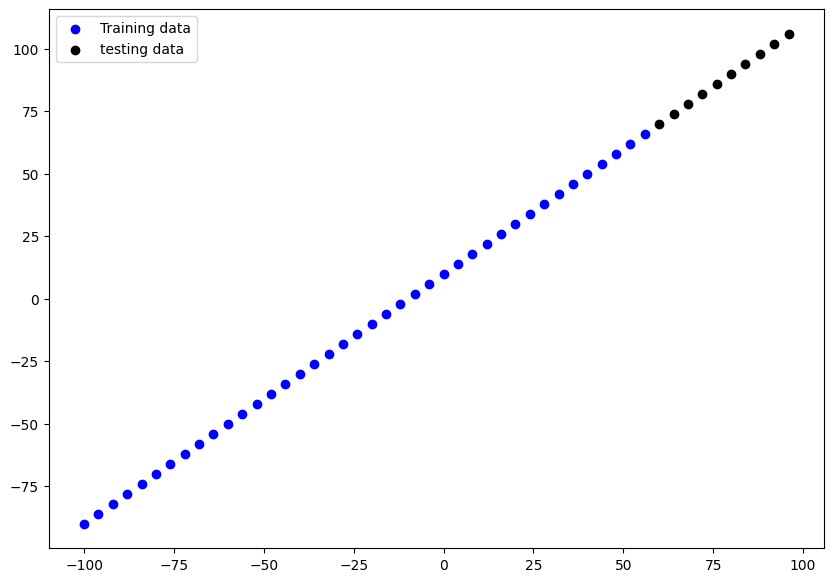

In [29]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="Training data")
plt.scatter(X_test,y_test,c="k",label="testing data")
plt.legend();

In [30]:
## Lat's have a look for how build nn

#1.Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3. fit the model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.9709 - mae: 9.9709
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.2965 - mae: 8.2965  
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.9811 - mae: 8.9811 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.0055 - mae: 8.0055 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.6674 - mae: 9.6674
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9876 - mae: 7.9876  
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.6558 - mae: 9.6558  
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9698 - mae: 7.9698  
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.6442 - mae: 9.6442  
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9520 - mae: 7.9520  
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6326 - mae: 9.6326 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9341 - mae: 7.9341 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8

### visualizing the model

In [31]:
# model .build()
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [32]:
X[0],y[0]

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([-100], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [33]:
# from keras import models
# from keras import layers
# # Create a model witch builds automatically by defining the input_shape
# tf.random.set_seed(42)
# # 1. Create a model
# model = models.Sequential([])
# # model.add(layers.Dense(1,input_shape=[1,1]))
# model.add(layers.Dense(1,input_shape=[1,1]))

# # 2. compile the model
# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=["mea"])

In [34]:
from os import name
# Create a model witch builds automatically by defining the input_shape
# tf.random.set_seed(42)

#1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1,1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model")
# compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["mae"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 1, 10)               │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1, 1)                │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Let's fit our model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 41.0620 - mae: 41.0620  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 41.0551 - mae: 41.0551 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 41.0494 - mae: 41.0494 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.0450 - mae: 41.0450 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.0411 - mae: 41.0411 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 41.0415 - mae: 41.0415 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 41.0413 - mae: 41.0413 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.0410 - mae: 41.0410 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 41.0408 - mae: 41.0408
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 41.0405 - mae: 41.0405 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 41.0403 - mae: 41.0403
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 41.0400 - mae: 41.0400 
Epoch 13/100
2/2 ━━━━━━━

In [37]:
# Get a summaer of our model
model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 1, 10)               │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1, 1)                │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

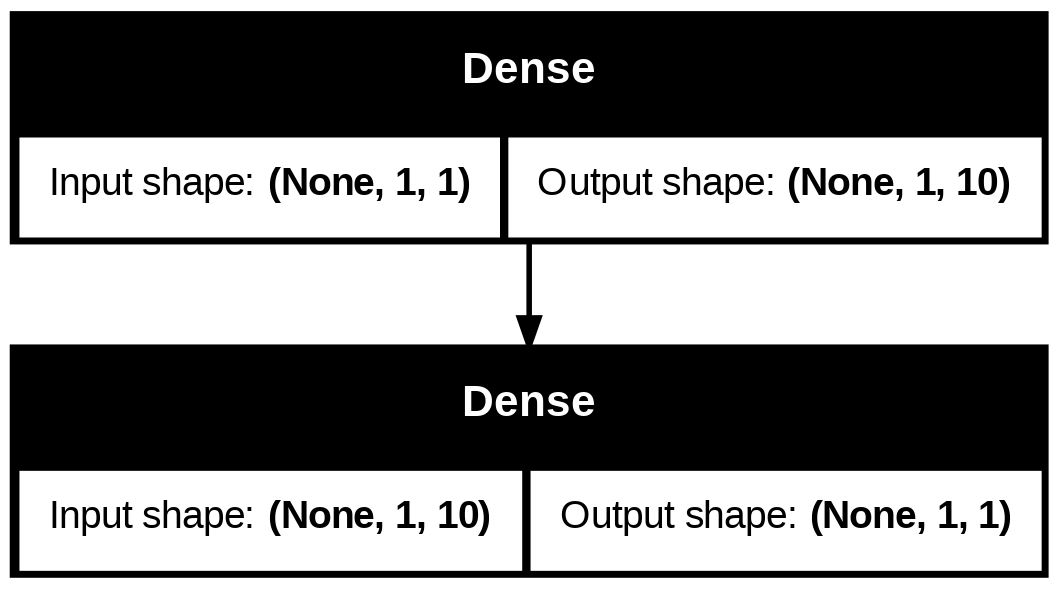

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

### Visualizing our model's prediction

In [39]:
# Make some predictions
y_pred =model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[[5.437615 ]],

       [[5.8029203]],

       [[6.1682296]],

       [[6.533535 ]],

       [[6.898841 ]],

       [[7.2641454]],

       [[7.6294537]],

       [[7.9947605]],

       [[8.360068 ]],

       [[8.725373 ]]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [41]:
# Let's create a plotting function
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    prediction=y_pred):
  """
  plots training data , test data and compares predictions to ground truth
  """
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  #plot testing data into green
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  # PLot model's predictions in red
  plt.scatter(test_data,prediction,c="r",label="Predictions")
  #show the legend
  plt.legend();

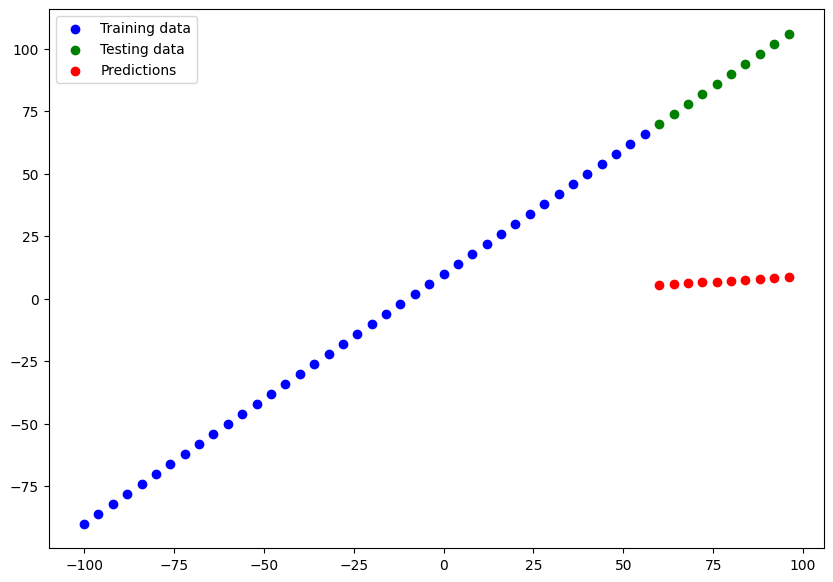

In [42]:
plot_prediction()

### Evaliatino our models's predictions with regression evaluation metrics

In [43]:
# Evaluate the model on the test
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 80.9185 - mae: 80.9185


[80.91850280761719, 80.91850280761719]

In [44]:
y_pred

array([[[5.437615 ]],

       [[5.8029203]],

       [[6.1682296]],

       [[6.533535 ]],

       [[6.898841 ]],

       [[7.2641454]],

       [[7.6294537]],

       [[7.9947605]],

       [[8.360068 ]],

       [[8.725373 ]]], dtype=float32)

In [45]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [46]:
# Calculate the mean absolut error
tf.keras.losses.MAE(
    y_test, y_pred
)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[82.562386],
       [82.19708 ],
       [81.83177 ],
       [81.46646 ],
       [81.10116 ],
       [80.735855],
       [80.370544],
       [80.00524 ],
       [79.63993 ],
       [79.27463 ]], dtype=float32)>

In [47]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([5.437615 , 5.8029203, 6.1682296, 6.533535 , 6.898841 , 7.2641454,
       7.6294537, 7.9947605, 8.360068 , 8.725373 ], dtype=float32)>

In [48]:
y_pred.shape

(10, 1, 1)

In [49]:
mae=tf.keras.losses.MAE(
    y_true=y_test,y_pred=tf.squeeze(y_pred)
)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=80.9185>

### Calculate the mean square error

In [50]:
tf.keras.losses.MSE(
    y_true=y_test,y_pred=tf.squeeze(y_pred)
)

<tf.Tensor: shape=(), dtype=float32, numpy=6656.7954>

In [51]:
# Make some function to reuse MAE and MSE
def mae(y_true,y_pred):
  return tf.keras.losses.MAE(y_true=y_true,
                             y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.keras.losses.MSE(y_true=y_true,y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

In [52]:
X_train , y_train

(<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44],
        [  48],
        [  52],
        [  56]], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [53]:
tf.random.set_seed(42)
#1.Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])
#2.compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"]
                )

# 3. fit
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 33.1484 - mae: 33.1484 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.7484 - mae: 9.7484
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.3707 - mae: 11.3707 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.3894 - mae: 8.3894
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.8581 - mae: 9.8581 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.5162 - mae: 11.5162
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.4991 - mae: 8.4991  
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.9679 - mae: 9.9679   
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.6618 - mae: 11.6618 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.6089 - mae: 8.6089 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.0776 - mae: 10.0776 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.8074 - mae: 11.8074 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


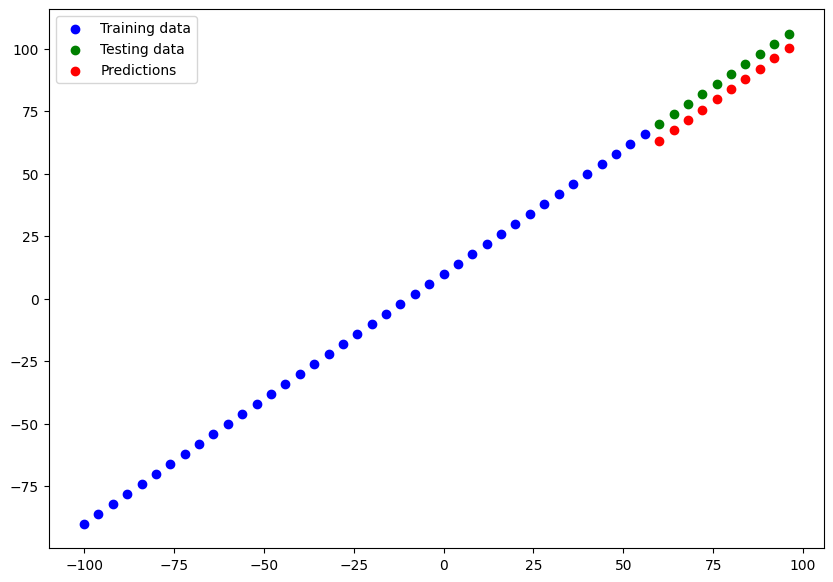

In [54]:
# Make and plot prediction for model_1
y_preds_1=model_1.predict(X_test)
plot_prediction(prediction=y_preds_1)

In [55]:
# Calcaulate model_1 evaluation
mae_1=mae(y_test,y_preds_1)
mse_1=mse(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=6.2136602>,
 <tf.Tensor: shape=(), dtype=float32, numpy=38.731453>)

### Build model_2

In [56]:
tf.random.set_seed(42)

#1. Create the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2.compile
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

#3. fit the modl
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 49.7605 - mse: 3521.4023 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30.9569 - mse: 1309.1317  
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 27.0956 - mse: 1005.2184
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.8841 - mse: 387.3172 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.8024 - mse: 475.8359 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.3574 - mse: 239.9632 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 15.1243 - mse: 320.4708
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.6810 - mse: 335.0312  
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.5619 - mse: 214.2411 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14.3735 - mse: 287.1925
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.9623 - mse: 192.1765
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.7787 - mse: 301.9227  
Epoch 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


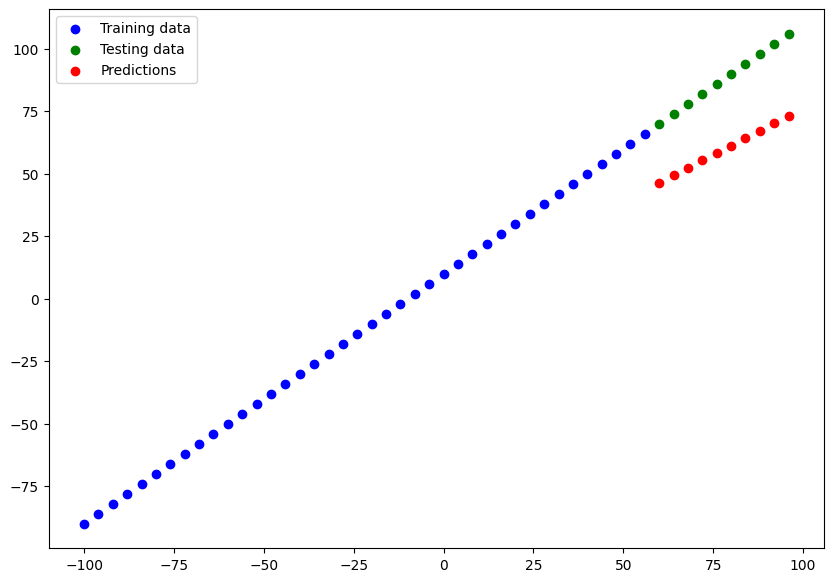

In [57]:
# make and plot predictions of model_2
y_preds_2=model_2.predict(X_test)

plot_prediction(prediction=y_preds_2)

In [58]:
# Calculate model_2
mae_2=mae(y_test,y_preds_2)
mse_2=mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=28.196783>,
 <tf.Tensor: shape=(), dtype=float32, numpy=803.6361>)

 # Build model_3

In [59]:
tf.random.set_seed(42)

# 1. Create a model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
#3.fit
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 25.3363 - mae: 25.3363 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.8406 - mae: 22.8406 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.3139 - mae: 22.3139 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.3191 - mae: 19.3191 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.9144 - mae: 17.9144 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.1101 - mae: 12.1101 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.9353 - mae: 14.9353 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.6444 - mae: 15.6444 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.6436 - mae: 11.6436 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.5966 - mae: 14.5966 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.6187 - mae: 15.6187 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.8466 - mae: 11.8466
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


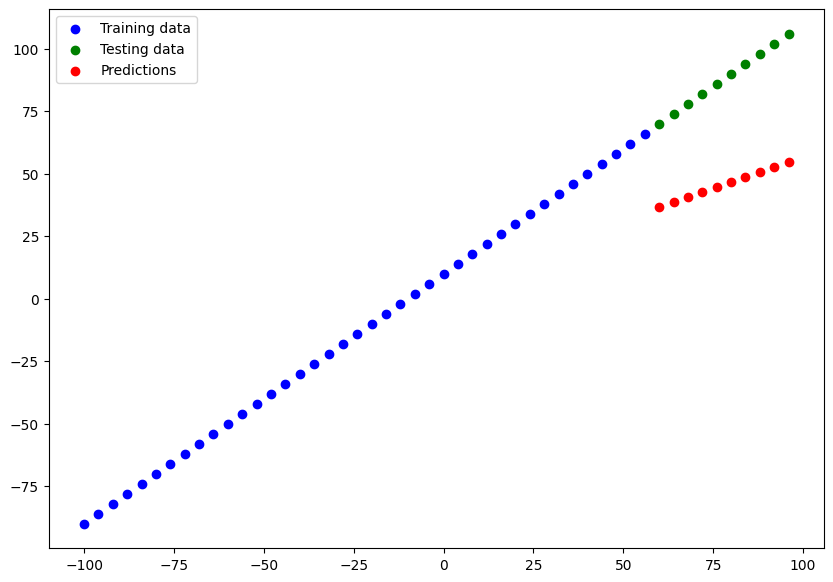

In [60]:
# Make and plot
y_preds_3=model_3.predict(X_test)
plot_prediction(prediction=y_preds_3)

In [61]:
# make mae
mae_3=mae(y_test,y_preds_3)
mse_3=mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=42.35827>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1826.2805>)

### Comparing the result of our experiments


In [62]:
# Let's compat our model's result using a pandas DataFrame
import pandas as pd
model_result=[["model_1",mae_1.numpy(),mse_1.numpy()],
             ["model_2",mae_2.numpy(),mse_2.numpy()],
             ["model_3",mae_3.numpy(),mse_3.numpy()],]

all_result=pd.DataFrame(model_result,columns=["model","mae","mse"])
all_result

,model,mae,mse
0,model_1,6.213660,38.731453
1,model_2,28.196783,803.636108
2,model_3,42.358269,1826.280518


In [63]:
model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Traking your experiments

## Saving our model

In [64]:
# Save model using the HDF5 format
model_2.save('your_model_name.h5')


## Load model

In [65]:
loaded_SaveModel_format=tf.keras.models.load_model("/content/your_model_name.h5")

In [66]:
loaded_SaveModel_format.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [67]:
# Compare model_2 prediction with SavedModel format model prediction
model_2_preds=model_2.predict(X_test)
loaded_SaveModel_format_preds=loaded_SaveModel_format.predict(X_test)
model_2_preds==loaded_SaveModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [68]:
mae(y_true=y_test,y_pred=model_2_preds)==mae(y_true=y_test,y_pred=loaded_SaveModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [69]:
model_2_preds.squeeze()==loaded_SaveModel_format_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

# Download a model from Google colab

In [70]:
from google.colab import files
files.download("/content/your_model_name.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>